## Support Vector Classifier Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## create synthetic data points
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [4]:
X

array([[ 0.90952915, -0.36265568],
       [ 0.96302817, -0.91097322],
       [ 0.5383975 , -0.59728762],
       ...,
       [ 1.94999303, -1.38400653],
       [-1.90567052, -0.01379879],
       [-2.11134157,  0.00322325]])

In [5]:
y

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

<Axes: xlabel='0', ylabel='1'>

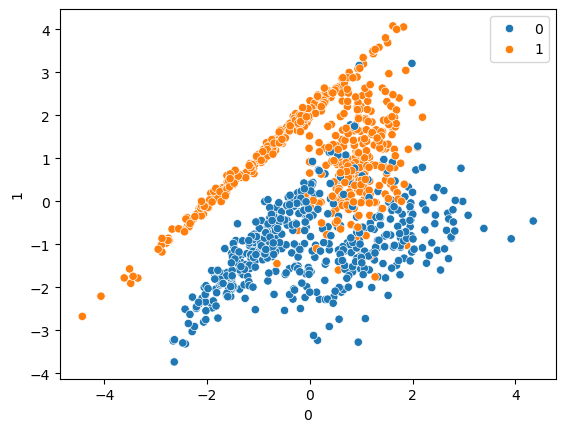

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [8]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [9]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
y_pred = svc.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true=y_test, y_pred=y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       115
           1       0.89      0.85      0.87       135

    accuracy                           0.86       250
   macro avg       0.86      0.87      0.86       250
weighted avg       0.87      0.86      0.86       250

[[101  14]
 [ 20 115]]


In [12]:
from sklearn.svm import SVC
rbf = SVC(kernel='rbf')

In [13]:
rbf.fit(X_train, y_train)

SVC()

In [14]:
y_pred1 = rbf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true=y_test, y_pred=y_pred1))
print(confusion_matrix(y_true=y_test, y_pred=y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       115
           1       0.92      0.92      0.92       135

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[104  11]
 [ 11 124]]


In [16]:
from sklearn.svm import SVC
poly = SVC(kernel='poly')
poly.fit(X_train, y_train)
y_pred2 = rbf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true=y_test, y_pred=y_pred2))
print(confusion_matrix(y_true=y_test, y_pred=y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       115
           1       0.92      0.92      0.92       135

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[104  11]
 [ 11 124]]


## Hyperparameter tuning With GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

### Define Paramerter Range
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly']
}

In [18]:
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, verbose=3)

In [19]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.853 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.860 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.867 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [20]:
grid.best_score_

0.9306666666666666

In [21]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [22]:
y_pred2 = grid.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true=y_test, y_pred=y_pred2))
print(confusion_matrix(y_true=y_test, y_pred=y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       115
           1       0.94      0.92      0.93       135

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[107   8]
 [ 11 124]]
